[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Hypothesis%20Testing/Python/t%2dTests.ipynb)

# Definitions

A t-test is a parametric statistical hypothesis test in which the Null hypothesis is defined in terms of a [Student's *t* distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing). The main assumptions of the *t* test that you typically need to worry about are that the data are sampled randomly (independently) from a population and are normally distributed (see the [*t* distribution notebook](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing) for more details).

Below we describe three basic types of t-tests.

# Getting started with code

Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Hypothesis Testing/tTest.m" and "Hypothesis Testing/tTestDemo.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# One-sample t-test

For a one-sample test, you are comparing the mean of your sample to a fixed value. Here we compute the *t*-statistic from your sample $X$ as described [here](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Student%20t.ipynb):

$\quad t=\frac{\bar{X}-\mu}{S/\sqrt{n}}$, where $S=\sqrt{\frac{1}{n-1}\sum^n_{i-1}(X_i-\bar{X})^2}$

Where $\mu$ is the mean of the Null distribution (i.e., the value you are comparing your sample to). The *t*-test for $H_0:mean=\mu$ is just the probability of obtaining the value of your test statistic *t*, given the Student's *t* distribution with $(n–1)$ degrees of freedom.

Below is some code computing the *t*-statistic and associated *p*-values as above or using python scipy tools.

In [4]:
# Define the population distribution
mu = 1
sigma = 1

# Get random samples
# this function simulates drawing N samples from a population that follows a
# normal distribution with a specified average (mu) and a specified variability
# (sigma)
N = 10
X = np.random.normal(mu, sigma, N)

# Compute the sample mean
X_bar = X.mean()

# Compute the sample std
S_bar = np.sqrt((1/(N-1))*np.sum((X-X_bar)**2)) # same as S = X.std(ddof=1);

# Compute the t-statistic
t = X_bar*np.sqrt(N)/S_bar

# The p-value is the probabilty of obtaining the t-statistic under the null
# hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees
# of freedom (multiplied by two because we are looking at two symmetric tails)
p = 2.*(1-st.t.cdf(t, N-1))

# Compare to what we get from ttest_1samp
tstat, pval = st.ttest_1samp(X, 0)

print(f't = {t:.4f} (computed) {tstat:.4f} (from ttest_1samp)')
print(f'p = {p:.4f} (computed) {pval:.4f} (from ttest_1samp)')

t = 4.1844 (computed) 4.1844 (from ttest_1samp)
p = 0.0024 (computed) 0.0024 (from ttest_1samp)


Here is a demo showing how the t-distribution evolves in a simple experiment as the sample size increases, when we have Gaussian-distributed data and want to use a one-sample t-test to determine if we can reject the Null hypothesis that the mean of the test distribution equals zero.

A (slow) animation will play below, with four panels (listed bottom-to-top):

1\. The data-generating process: The dashed red curve shows the true generating process, which is a Gaussian distribution with mean=1, std=3. Data from one "experiment" are shown as a normalized histogram (blue bars) for each *n*. For comparison, the Null distribution (mean=0, std=3) is shown as the solid red curve.

2\. The distribution of means across many (now set to 10000) experiments: The dashed red curve shows the true distribution of means from the true data-generating process, with mean=1 and a standard error of the mean that decreases with increasing *n*. The distribution of means from the simulated experiments are shown as a normalized histogram (bars). For comparison, the distribution of means from the Null distribution is shown as the solid red curve.
  
3\. The test statistic is the t-statistic, which we compute for each experiment using the equation shown above. The bars are a normalized histogram of this statistic across the simulated experiments. The dashed red line is the expected distribution of this statistic, given our (known) data-generating process. The solid red line is the expected distribution of the t-statistic if the Null hypothesis were true. The solid green line is the standard normal distribution (mean=0, std=1) -- note that the Null distribution quickly approaches the standard normal distribution as *n* increases. The vertical bar is the point at which 0.025 of the Null distribution is to the right of that point; i.e., the value of the test statistic that would correspond to (two-tailed) *p*=0.05.

4\. The probability of a "hit" (using a one-sample t-test to reject the null hypothesis when it should be rejected) as a function of the number of samples in each experiment.




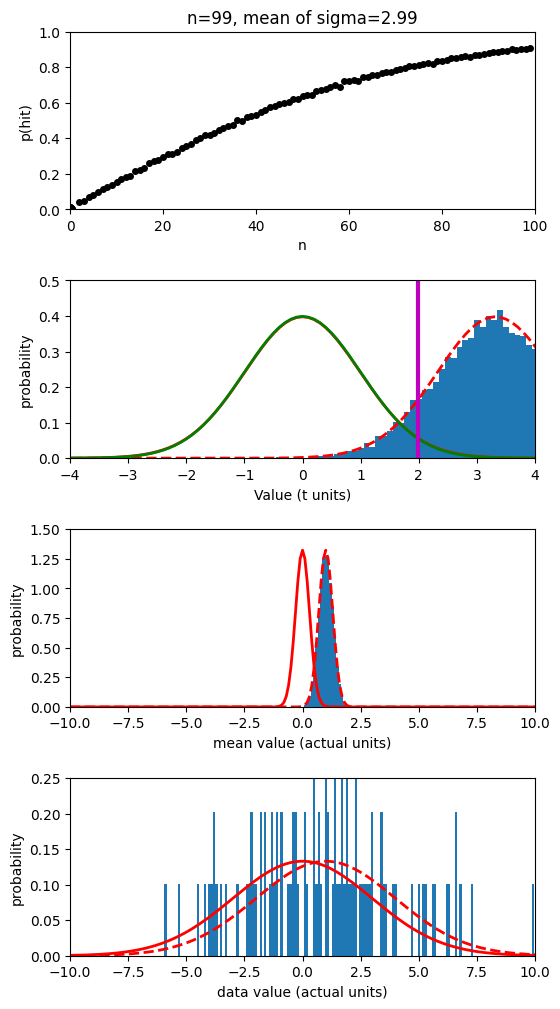

In [5]:
# Define a test distribution with a population mean different than 0 and a std of >1
test_mu  = 1
test_std = 3

# Null distribution
null_mu  = 0
null_std = test_std

# Max number of samples
max_n = 100

# for histograms
data_bin_size = 0.1
data_bins = np.arange(-10-data_bin_size/2, 10+1.5*data_bin_size, data_bin_size)
dax = (data_bins[1:] + data_bins[:-1])/2

# for simulations
num_experiments = 10000

# Set up figure
fig, axs = plt.subplots(4, 1, figsize=(6, 12))
fig.subplots_adjust(hspace=0.4)

# Simulate different sample sizes
for n in np.arange(2, max_n):

    # Clear figures
    plt.axes(axs[1]).cla()
    plt.axes(axs[2]).cla()
    plt.axes(axs[3]).cla()

    # Simulate multiple experiments
    samples = np.random.normal(test_mu, test_std, (num_experiments, n))

    # Compute the t-statistic from each experient
    t_stats = samples.mean(axis=1)/samples.std(axis=1,ddof=1)*np.sqrt(n)

    # Top plot is probability of identifying a real effect as a function of n
    plt.axes(axs[0]).axis([0, max_n, 0, 1])
    plt.plot(0, 0, 'ko')
    plt.xlabel('n')
    plt.ylabel('p(hit)')
    plt.axes(axs[0]).plot(n, np.count_nonzero(t_stats>st.t.ppf(0.975, n-1))/num_experiments, 'k.', markersize=8)
    plt.title(f'n={n}, mean of sigma={samples.std(axis=1, ddof=1).mean():.2f}')

    # Second-to-top plot is normal, t distributions of mean, and samples
    counts, edges = np.histogram(t_stats, data_bins)
    plt.axes(axs[1]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.t.pdf(dax, n-1), 'r-', linewidth=2)
    plt.plot(dax, st.t.pdf(dax-test_mu/test_std*np.sqrt(n), n-1), 'r--', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, 0, 1), 'g-', linewidth=2)
    plt.plot(st.t.ppf(0.975, n-1)*np.array([1.0, 1.0]), [0, 0.5], 'm-', linewidth=3)

    # set/label axes
    plt.axis([-4, 4, 0, 0.5])
    plt.xlabel('Value (t units)')
    plt.ylabel('probability')

    # Second-to-bottom plot is distributions of means
    counts, edges = np.histogram(samples.mean(axis=1), data_bins)
    plt.axes(axs[2]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.norm.pdf(dax, null_mu, null_std/np.sqrt(n)), 'r-', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, test_mu, test_std/np.sqrt(n)), 'r--', linewidth=2)

    # set/label axes
    plt.axis([-10, 10, 0, 1.5])
    plt.xlabel('mean value (actual units)')
    plt.ylabel('probability')

    # Bottom plot is null, test distributions. Show one 'experiment'
    counts, edges = np.histogram(samples[0,:], bins=data_bins)
    plt.axes(axs[3]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.norm.pdf(dax, null_mu, null_std), 'r-', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, test_mu, test_std), 'r--', linewidth=2)

    # set/label axes
    plt.axis([-10, 10, 0, 0.25])
    plt.xlabel('data value (actual units)')
    plt.ylabel('probability')

    # Clear for next plot
    display(fig)
    clear_output(wait=True)

# Two-sample paired t-test


For a two-sample paired test, you are comparing the means of two samples representing data that have been collected in pairs and are assumed to have the same variances). Here we compute the *t*-statistic in terms of the distribution of differences $D$ between the paired samples
$X$ and $Y$:

$\quad t=\frac{\bar{D}-\mu}{S_D/\sqrt{n}}$, where $D_i=X_i-Y_i$, and $S_D$ is the standard deviation of the difference, computed as above.

We can then perform the equivalent one-sample *t*-test, as in the code below.


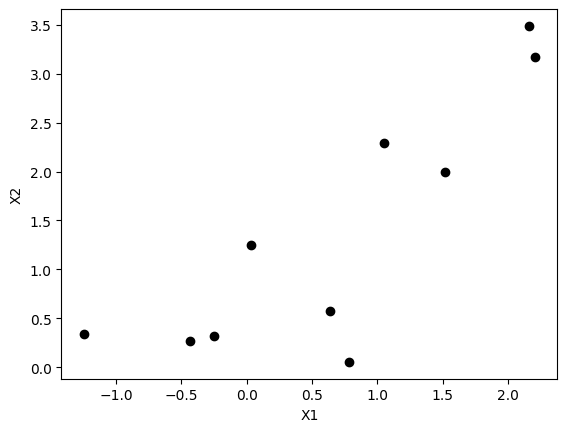

variance=0.5006 (computed), 0.5006 (python function)
t = 3.2699 (computed) 3.2699 (python function)
p = 0.0097 (computed) 0.0097 (python function)


In [6]:
# Define paired measurements in terms of a difference and then additive 0-mean noise
mu          = 1
sigma       = 1
mu_diff     = 1
mu_noise    = 0
sigma_noise = 0.5

# Get random samples
N = 10
X1 = np.random.normal(mu, sigma, N)
X2 = X1 + mu_diff + np.random.normal(mu_noise, sigma_noise, N)

# Compute the difference
D = X2 - X1

# Note that X1 and X2 are highly correlated (see figure), so the variance (or std) of the difference needs to take into account the covariance
# var(X2 - X1) = cov(X2 - X1, X2 - X1)
#              = cov(X2, X2) + cov(X1, X1) - cov(X2, X1) - cov(X1, X2)
#              = var(X2) + var(X1) - cov(X2,X1) - cov(X1,X2)
plt.plot(X1, X2, 'ko', markerfacecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
cov = np.cov(X1, X2)
print(f'variance={cov[0,0]+cov[1,1]-cov[0,1]-cov[1,0]:.4f} (computed), {D.var(ddof=1):.4f} (python function)')

# Compute the t-statistic
t_D = D.mean()*np.sqrt(N)/D.std(ddof=1)

# The p-value is the probabilty of obtaining the t-statistic under the null hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees of freedom (multiplied by two because we are looking at two symmetric tails)
p_D = 2.*(1-st.t.cdf(t_D, N-1))

# Compare to what we get from ttest
tstat, pval = st.ttest_1samp(D, 0)

print(f't = {t_D:.4f} (computed) {tstat:.4f} (python function)')
print(f'p = {p_D:.4f} (computed) {pval:.4f} (python function)')


# Two-sample unpaired t-test


For a two-sample unpaired test, we are comparing the means of two samples representing data that have been collected independently. There are several different ways of computing this test, depending on your assumptions and your data:

1\. When the two samples are of the same size (equal *n*) and are assumed to have the same variances (which you can and should [test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda359.htm)), then the test statistic is:

$\quad t=\frac{\bar{X_1}-\bar{X_2}}{S_p\sqrt{\frac{2}{n}}}$, where $S_p=\sqrt{\frac{S^2_{x_1}+S^2_{x_2}}{2}}$

with $2n–2$ degrees of freedom. See code below for an example.

2\. When the two samples are not of the same size (unequal *n*) and are assumed to have the same variances (which you can and should [test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda359.htm)), then the test statistic is:

$\quad t=\frac{\bar{X_1}-\bar{X_2}}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$, where $S_p=\sqrt{\frac{(n_1-1)S^2_{x_1}+(n_2-1)S^2_{x_2}}{n_1+n_2-2}}$

with $n_1+n_2–2$ degrees of freedom.

3\. When the two samples are not of the same size (unequal *n*) and are not assumed to have the same variances, then you need to use an adaptation of the *t*-test known as Welch's *t*-test.



In [7]:
# Define unpaired measurements, same sigma
mu_1 = 1
mu_2 = 2
sigma = 1

# Get random samples, same n
N = 10
X1 = np.random.normal(mu_1, sigma, N)
X2 = np.random.normal(mu_2, sigma, N)

# Compute test statistic
Sp = np.sqrt((X1.var(ddof=1) + X2.var(ddof=1))/2)
t_U = (X1.mean()-X2.mean())/(Sp*np.sqrt(2/N))

# The p-value is the probabilty of obtaining the t-statistic under the null hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees of freedom (multiplied by two because we are looking at two symmetric tails)
p_U = 2.*(1-st.t.cdf(abs(t_U), 2*N-2))

# Compare to what we get from ttest (use ttest_ind for two independent samples)
tstat, pval = st.ttest_ind(X1, X2)

print(f't = {t_U:.4f} (computed) {tstat:.4f} (python function)')
print(f'p = {p_U:.4f} (computed) {pval:.4f} (python function)')

t = -3.4182 (computed) -3.4182 (python function)
p = 0.0031 (computed) 0.0031 (python function)


# Additional Resources


# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania